<a href="https://colab.research.google.com/github/andreidore/aicrowd_practice/blob/master/olnwp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
!rm -rf data
!mkdir data
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/olnwp/v0.1/test.zip
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/olnwp/v0.1/train.zip
!unzip train.zip
!unzip test.zip
!mv train.csv data/train.csv
!mv test.csv data/test.csv

--2020-05-22 08:16:33--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/olnwp/v0.1/test.zip
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.11, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2628035 (2.5M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]   2.51M  1.54MB/s    in 1.6s    

2020-05-22 08:16:36 (1.54 MB/s) - ‘test.zip’ saved [2628035/2628035]

--2020-05-22 08:16:38--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/olnwp/v0.1/train.zip
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.11, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting

In [0]:
all_data = pd.read_csv('data/train.csv')

In [5]:
all_data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000
mean,354.110802,10.403449,552.377282,0.555933,1.009337,0.696678,10.898648,3.304733,4.588344,1.259177,4.548023,7.233538,0.052822,0.179398,0.157599,0.059900,0.185460,0.212643,25.764354,1153.234790,313.182115,13539.935582,753374.752457,259086.610210,1119.137347,5657.790085,3136.969229,3853.119811,10324.538299,6288.260675,0.170438,0.186552,0.186627,0.181017,0.144272,0.062422,0.068672,0.131094,0.184483,0.141560,0.216390,0.222987,0.234542,0.443474,0.119235,0.039607,0.016587,0.682175,0.287856,0.353623,0.094825,0.757686,-0.259757,-0.522776,-0.107678,0.282236,0.071113,0.342243,0.156345,3369.156094
std,213.485655,2.122533,472.605248,4.300199,6.389915,3.987187,11.254509,3.855560,8.377796,4.212860,0.844332,1.910501,0.223682,0.383693,0.364372,0.237306,0.388678,0.409185,69.226548,3412.864512,616.649425,57567.108728,213790.768136,134639.145918,1136.222417,5941.869520,1323.234647,18370.270892,41728.980107,23239.178344,0.376024,0.389559,0.389619,0.385040,0.351372,0.241926,0.252900,0.337510,0.262251,0.219365,0.282227,0.294359,0.289642,0.116349,0.096861,0.017340,0.010769,0.190151,0.156012,0.104505,0.070493,0.247909,0.128229,0.290208,0.096784,0.324309,0.266373,0.188296,0.227084,10971.259269
min,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,165.000000,9.000000,248.000000,0.470000,1.000000,0.625430,4.000000,1.000000,1.000000,0.000000,4.479927,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,448.000000,142.025714,0.000000,843300.000000,173010.000000,0.000000,3564.727273,2383.380145,642.000000,1100.000000,989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025046,0.025012,0.028571,0.028571,0.0

In [7]:
all_data["url"]

0        http://mashable.com/2013/08/01/chromecast-hbo-...
1        http://mashable.com/2014/04/10/scrabble-geocache/
2        http://mashable.com/2013/11/11/sony-unboxing-ps4/
3        http://mashable.com/2014/10/18/comic-sans-type...
4        http://mashable.com/2013/03/26/yahoo-buys-summly/
                               ...                        
26556               http://mashable.com/2013/05/02/iflask/
26557    http://mashable.com/2013/08/10/internet-securi...
26558    http://mashable.com/2014/12/03/indiegogo-insur...
26559    http://mashable.com/2013/01/22/obama-sings-sex...
26560    http://mashable.com/2013/11/07/space-burial-co...
Name: url, Length: 26561, dtype: object

In [8]:
all_data = all_data.drop('url',1)
all_data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,525.0,10.0,238.0,0.658120,1.0,0.821918,7.0,5.0,1.0,0.0,4.516807,9.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1100.0,344.625,0.0,843300.0,138888.888889,0.0,3276.068815,2119.142483,751.0,751.0,751.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022273,0.336825,0.113219,0.171540,0.356143,0.333174,0.113796,0.050420,0.008403,0.857143,0.142857,0.188510,0.100000,0.4,-0.133333,-0.166667,-0.10,0.250000,0.000000,0.250000,0.000000,782
1,273.0,11.0,545.0,0.474170,1.0,0.587719,21.0,2.0,21.0,1.0,4.836697,6.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1100.0,364.000,0.0,843300.0,215050.000000,0.0,3983.687500,2833.025154,1500.0,27100.0,14300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.033335,0.034267,0.033334,0.865730,0.033334,0.424611,0.101154,0.034862,0.025688,0.575758,0.424242,0.401356,0.100000,0.9,-0.248214,-0.300000,-0.05,0.000000,0.000000,0.500000,0.000000,6200
2,423.0,10.0,453.0,0.518265,1.0,0.669173,21.0,5.0,15.0,0.0,4.772627,8.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1400.0,323.250,1200.0,843300.0,211887.500000,1031.0,16100.000000,4916.574383,5900.0,17300.0,11600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025538,0.025859,0.025003,0.898352,0.025248,0.459715,0.135561,0.050773,0.011038,0.821429,0.178571,0.309091,0.100000,0.5,-0.380000,-0.700000,-0.20,0.300000,0.200000,0.200000,0.200000,723
3,80.0,11.0,814.0,0.456885,1.0,0.608787,2.0,2.0,1.0,0.0,4.671990,7.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,478.0,94.800,0.0,843300.0,337785.714286,0.0,4104.888889,2303.844586,1900.0,2700.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.735399,0.028575,0.178492,0.028594,0.028939,0.442508,0.131205,0.039312,0.019656,0.666667,0.333333,0.376799,0.033333,1.0,-0.195312,-0.600000,-0.05,0.277273,0.218182,0.222727,0.218182,809
4,653.0,11.0,113.0,0.711712,1.0,0.878788,5.0,4.0,0.0,0.0,4.504425,8.0,0.0,0.0,1.0,0.0,0.0,0.0,217.0,640.0,395.000,0.0,617900.0,112062.500000,0.0,5678.750000,2438.866301,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.524560,0.152964,0.271398,0.025741,0.025337,0.421402,0.325379,0.070796,0.000000,1.000000,0.000000,0.366212,0.136364,0.8,0.000000,0.000000,0.00,0.375000,-0.125000,0.125000,0.125000,1600


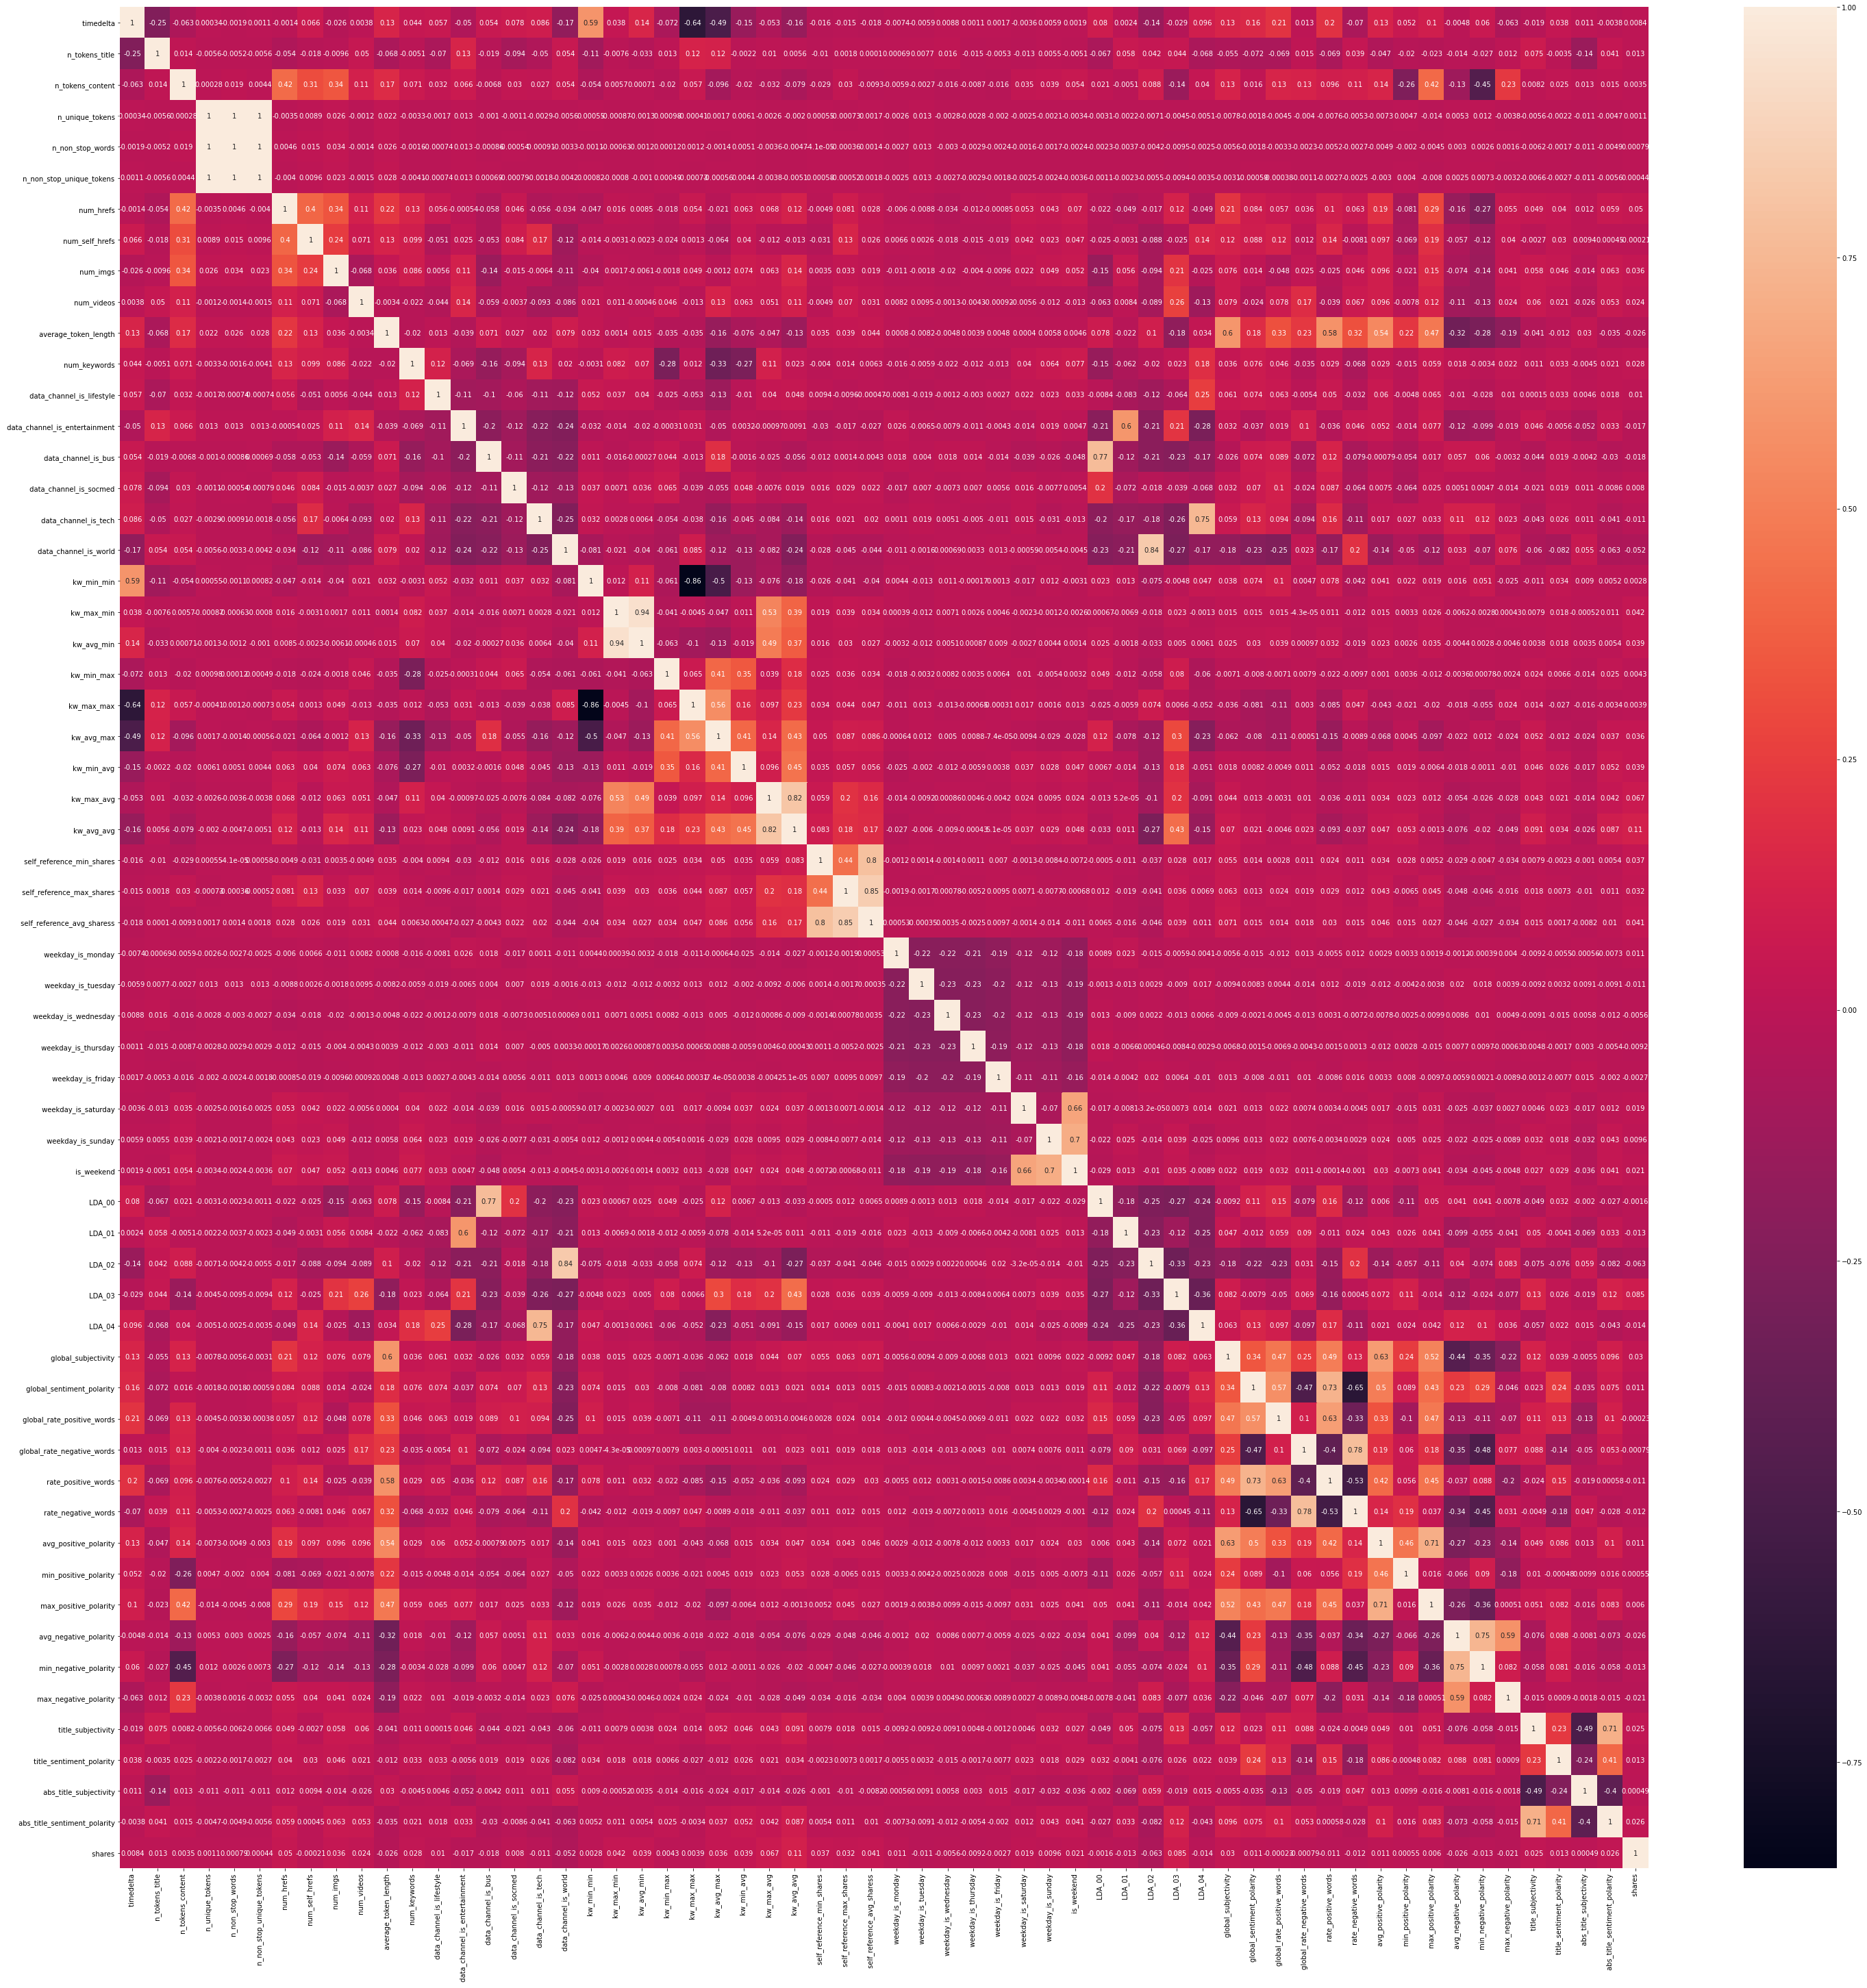

In [24]:
plt.figure(figsize=(50,50))
sns.heatmap(all_data.corr(), annot = True)

In [0]:
X = all_data.drop(' shares',1)
y = all_data[' shares']
# Validation testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
regressor = LinearRegression()  

from sklearn import tree
regressor = tree.DecisionTreeRegressor(max_depth=100)

regressor.fit(X_train, y_train)

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#print(coeff_df.head())

y_pred = regressor.predict(X_val)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 3999.6147186147186
Mean Squared Error: 221407965.179936
Root Mean Squared Error: 14879.783774636511


In [0]:
test_data = pd.read_csv('data/test.csv')

test_data = test_data.drop('url',1)
test_data.head()


y_test = regressor.predict(test_data)


y_inttest = [int(i) for i in y_test]
y_inttest = np.asarray(y_inttest)
df = pd.DataFrame(y_inttest,columns=[' shares'])
df.to_csv('submission.csv',index=False)



In [0]:
from google.colab import files
files.download('submission.csv')